In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-laba/titanic.csv


In [2]:
df  =pd.read_csv('/kaggle/input/titanic-laba/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


изучим как выживаемость зависит от возраста

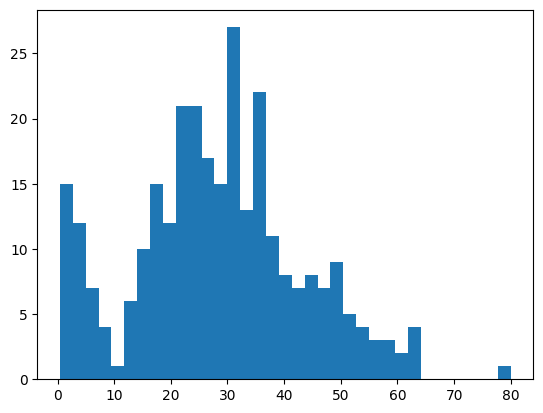

In [3]:
import matplotlib.pyplot as plt
plt.hist(df[(df["Survived"]==1)]["Age"],bins = 35)
plt.show()

как видим этот признак имеет значение,чаще всего выживали люди возрастом от 0-10 и от 20-35

In [4]:
df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

в колонке "Name" мы видим ,что перед именнами существуют метки о женидьбе женщины,возможно это как-то влияло на выживаемость

Создадим функцию ,которая добавит метку женидьбы в отдельную колонку

In [5]:
def a(name):
    if ('Mrs' in name ):
        return 1
    else:
        return 0
df['married'] = df['Name'].apply(a)

                              

Рассмотрим долю выживаемости среди женатых и не женатых женщин

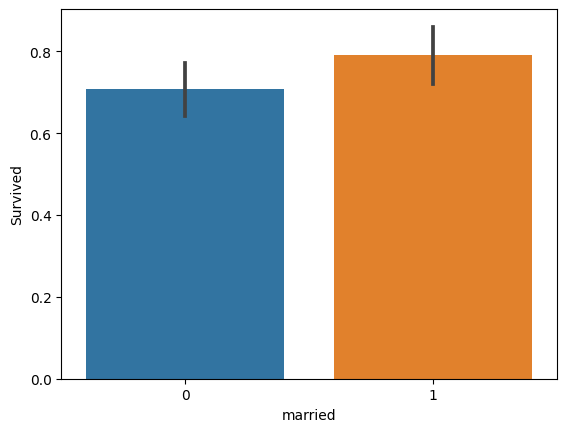

In [6]:
import seaborn as sns

graf = sns.barplot(df[df["Sex"]=='female'],x = "married",y = "Survived")

Как видим ,доля выживших среди женатых чуть выше

Рассотрим долю выживаемости среди женщин и мужчин

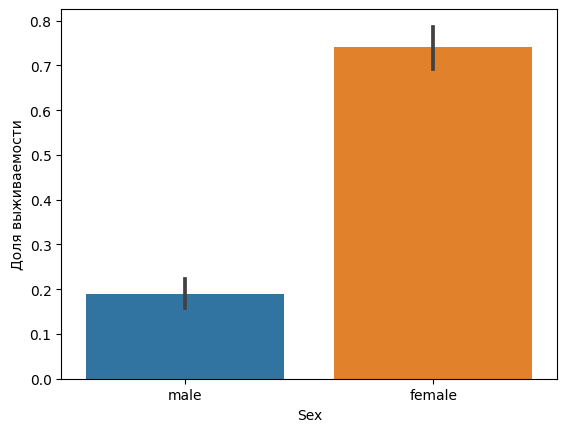

In [7]:
import seaborn as sns
graf = sns.barplot(df,x = "Sex",y = "Survived")
graf.set_ylabel("Доля выживаемости");

Расмотрим долю выживаемости взависимости от класса

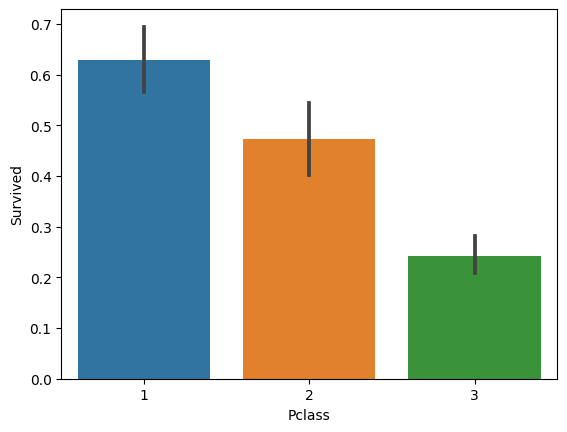

In [8]:
graf = sns.barplot(df,x = "Pclass",y = "Survived")

Расмотрим долю выживаемости взависимости от порта посадки

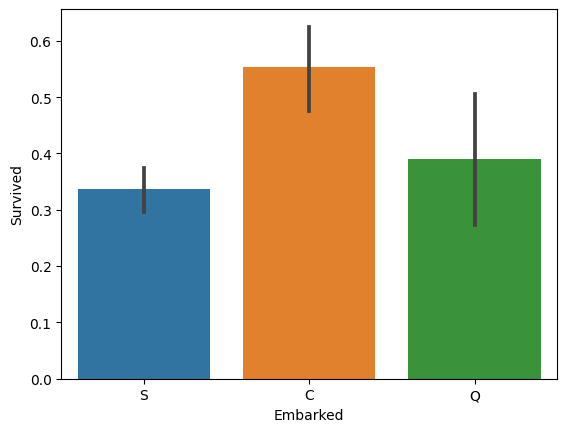

In [9]:
graf = sns.barplot(df,x = "Embarked",y = "Survived")

Расмотрим долю выживаемости взависимости от количества родтвенников на борту

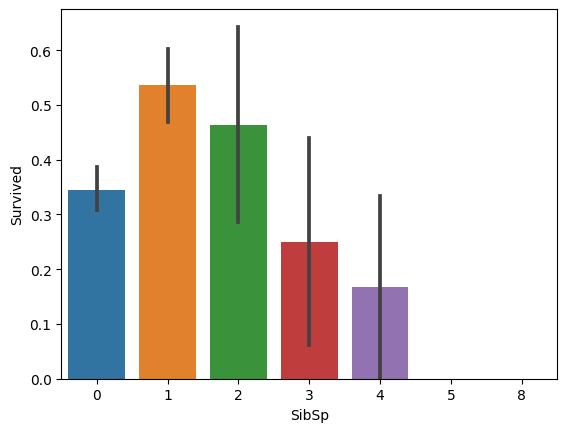

In [10]:
graf = sns.barplot(df,x = "SibSp",y = "Survived")

как видим разница присутвует

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
married          0
dtype: int64

In [12]:
df_education = df
df_education

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,married
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


удалим колонку "Cabin" т.к большая часть значений в ней это null

In [13]:
df_education =df_education.drop("Cabin",axis=1)
df_education

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,married
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0


Добавим новую колонку которая будет считать общий размер семьи

In [14]:
df_education["Family_size"]  =df_education["SibSp"] + df_education["Parch"]

In [15]:
df_education["Age"] = df_education['Age'].mean()
df_education  =df_education[~(df_education['Embarked'].isnull())]
df_education.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
married        0
Family_size    0
dtype: int64

Удалим некоторые колонки ,которые ни ак не влияют на выживаемость

In [16]:
df_education = df_education.drop(["PassengerId","Name","Ticket"],axis  =1)

In [17]:
categorial_col = df_education.select_dtypes(include=['object']).columns
categorial_col

Index(['Sex', 'Embarked'], dtype='object')

Изменяем категориальные признаки в вещественные

In [18]:
from sklearn.preprocessing import LabelEncoder
for col in categorial_col:
    le = LabelEncoder()
    df_education[col] = le.fit_transform(df_education[col])
df_education

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,married,Family_size
0,0,3,1,29.699118,1,0,7.2500,2,0,1
1,1,1,0,29.699118,1,0,71.2833,0,1,1
2,1,3,0,29.699118,0,0,7.9250,2,0,0
3,1,1,0,29.699118,1,0,53.1000,2,1,1
4,0,3,1,29.699118,0,0,8.0500,2,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,29.699118,0,0,13.0000,2,0,0
887,1,1,0,29.699118,0,0,30.0000,2,0,0
888,0,3,0,29.699118,1,2,23.4500,2,0,3
889,1,1,1,29.699118,0,0,30.0000,0,0,0


In [19]:
X = df_education.drop(columns = ['Survived']) 
y = df_education["Survived"]

Возможно на выживаемость влияет не один конкретный признак ,а их совокупность.Например,женщина аозрастом 20 лет имеет больше шанс на выживаемость ,чем 70летний мужчина

In [20]:
from sklearn.preprocessing import PolynomialFeatures
converter = PolynomialFeatures(degree = 2,interaction_only=False, include_bias=False)
converter.fit(X)
poly_featers = converter.transform(X)
poly_featers

array([[ 3.        ,  1.        , 29.69911765, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        ,  0.        , 29.69911765, ...,  1.        ,
         1.        ,  1.        ],
       [ 3.        ,  0.        , 29.69911765, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 3.        ,  0.        , 29.69911765, ...,  0.        ,
         0.        ,  9.        ],
       [ 1.        ,  1.        , 29.69911765, ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        ,  1.        , 29.69911765, ...,  0.        ,
         0.        ,  0.        ]])

Подбираем лучший learning_rate для нашей модели

In [21]:
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_classification 
from sklearn.preprocessing import StandardScaler 
from keras.models import Sequential 
from keras.layers import Dense,Dropout
import keras
X_train, X_test, y_train, y_test = train_test_split(poly_featers, y, test_size=0.2, random_state=42)

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)
rate = 0.0001
best_rate = 0
max_acc = -1
while rate< 0.01:
    model = Sequential() 
    model.add(Dense(20,activation = 'relu',input_shape = (X_train.shape[1],))) 

    model.add(Dense(8,activation= 'relu')) 

    model.add(Dense(4,activation= 'relu')) 

    #model.add(Dense(4,activation= 'relu'))
    #model.add(Dense(2,activation= 'relu'))
    model.add(Dense(1,activation = 'sigmoid'))
    opt = keras.optimizers.Adam(learning_rate=rate)
    model.compile(optimizer = opt,loss = 'binary_crossentropy',metrics = ['accuracy'])

    model.fit(X_train,y_train,epochs = 7,batch_size = 10,validation_split= 0.2) 
    loss,accuracy= model.evaluate(X_test,y_test) 
    if accuracy > max_acc:
        max_acc = accuracy
        best_rate = rate
    rate += 0.0001    

print(rate,max_acc)


Epoch 1/7


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5230 - loss: 0.6858 - val_accuracy: 0.6434 - val_loss: 0.6583
Epoch 2/7
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5777 - loss: 0.6540 - val_accuracy: 0.6713 - val_loss: 0.6388
Epoch 3/7
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5760 - loss: 0.6345 - val_accuracy: 0.6783 - val_loss: 0.6233
Epoch 4/7
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6234 - loss: 0.6142 - val_accuracy: 0.6853 - val_loss: 0.6076
Epoch 5/7
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6634 - loss: 0.5788 - val_accuracy: 0.6993 - val_loss: 0.5949
Epoch 6/7
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6256 - loss: 0.5798 - val_accuracy: 0.6993 - val_loss: 0.5850
Epoch 7/7
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6434 - loss: 0.5758 - val_accuracy: 0.6993 - val_loss: 0.5775
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6659 - loss: 0.5485 
Epoch 1/7
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.

Epoch 1/7


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7872 - loss: 0.4931 - val_accuracy: 0.8112 - val_loss: 0.4784
Epoch 2/7
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7993 - loss: 0.4471 - val_accuracy: 0.8182 - val_loss: 0.5032
Epoch 3/7
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7921 - loss: 0.4120 - val_accuracy: 0.7972 - val_loss: 0.4742
Epoch 4/7
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8076 - loss: 0.4093 - val_accuracy: 0.8112 - val_loss: 0.4640
Epoch 5/7
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8115 - loss: 0.4126 - val_accuracy: 0.7972 - val_loss: 0.4757
Epoch 6/7
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8233 - loss: 0.3568 - val_accuracy: 0.8042 - val_loss: 0.5026
Epoch 7/7
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8056 - loss: 0.3963 - val_accuracy: 0.8182 - val_loss: 0.4571
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8369 - loss: 0.4572 
accuracy: 0.7977527976036072
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/s

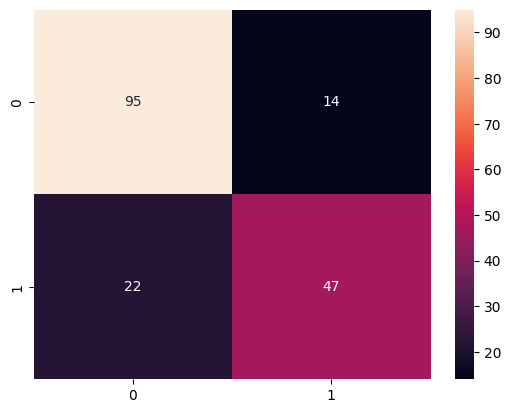

In [22]:
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_classification 
from sklearn.preprocessing import StandardScaler 
from keras.models import Sequential 
from keras.layers import Dense,Dropout
import keras
from sklearn.metrics import classification_report,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(poly_featers, y, test_size=0.2, random_state=42)

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)



model = Sequential() 
model.add(Dense(32,activation = 'leaky_relu',input_shape = (X_train.shape[1],))) 
model.add(Dense(16,activation= 'leaky_relu')) 
model.add(Dense(4,activation= 'leaky_relu'))
model.add(Dense(1,activation = 'sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.011)
model.compile(optimizer = opt,loss = 'binary_crossentropy',metrics = ['accuracy'])

model.fit(X_train,y_train,epochs = 7,batch_size = 10,validation_split= 0.2) 
loss,accuracy= model.evaluate(X_test,y_test) 
print(f'accuracy: {accuracy}' )
y_pred  = model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True)
print(classification_report(y_test,y_pred))

Расшифровка: модель в 143 случаях из 178 дала правильный ответ TP: 96 и TN: 47

Добавил обычную логистическую регрессию для эксперимента

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_validate
X_train, X_test, y_train, y_test = train_test_split(poly_featers, y, test_size=0.2, random_state=42)

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)
model = LogisticRegression() 
model.fit(X_train, y_train)

y_pred = model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 80.90%
